In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

In [3]:
train_original = train.copy()
test_original = test.copy()

In [4]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
train.shape

(614, 13)

In [6]:
test.shape

(367, 12)

In [7]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

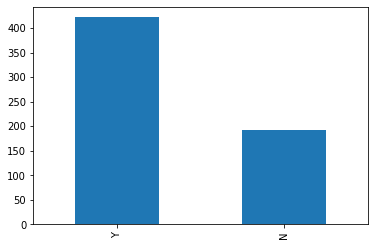

In [8]:
train['Loan_Status'].value_counts().plot.bar()

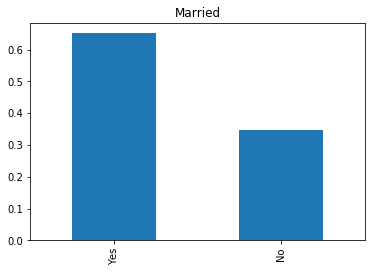

In [9]:
train['Married'].value_counts(normalize = True).plot.bar(title = 'Married')

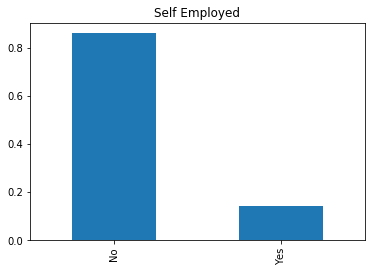

In [10]:
train['Self_Employed'].value_counts(normalize = True).plot.bar(title = 'Self Employed')

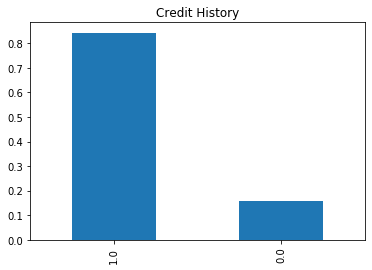

In [11]:
train['Credit_History'].value_counts(normalize = True).plot.bar(title = 'Credit History')

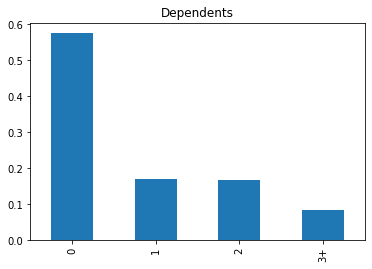

In [12]:
train['Dependents'].value_counts(normalize = True).plot.bar(title = 'Dependents')

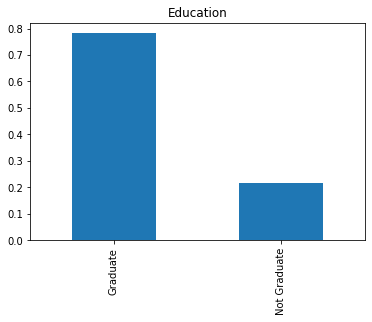

In [13]:
train['Education'].value_counts(normalize = True).plot.bar(title = 'Education')

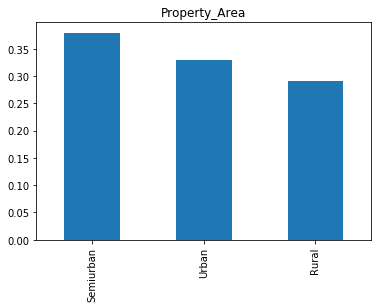

In [14]:
train['Property_Area'].value_counts(normalize = True).plot.bar(title = 'Property_Area')

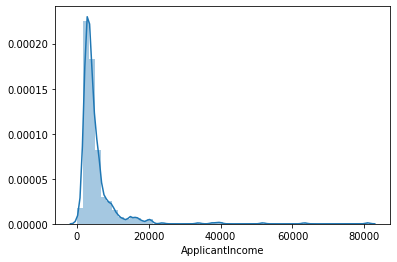

In [15]:
sns.distplot(train['ApplicantIncome'])

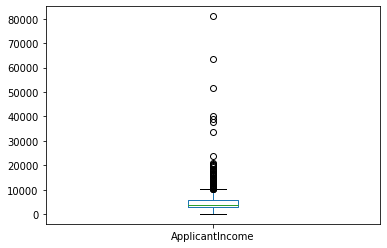

In [16]:
train['ApplicantIncome'].plot.box()

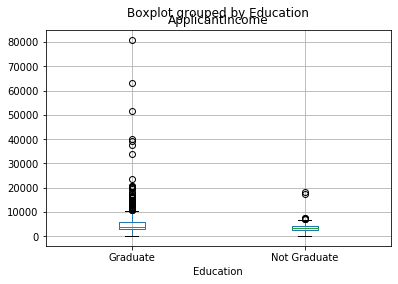

In [17]:
train.boxplot(column = "ApplicantIncome", by = 'Education')

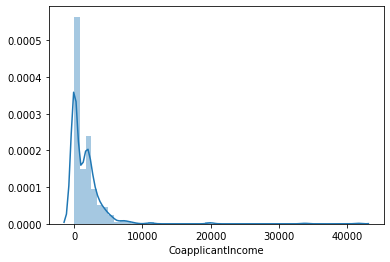

In [18]:
sns.distplot(train['CoapplicantIncome'])

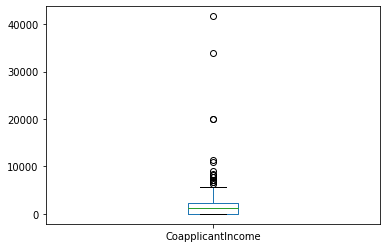

In [19]:
train['CoapplicantIncome'].plot.box()

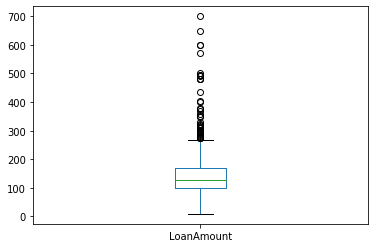

In [20]:
train['LoanAmount'].plot.box()

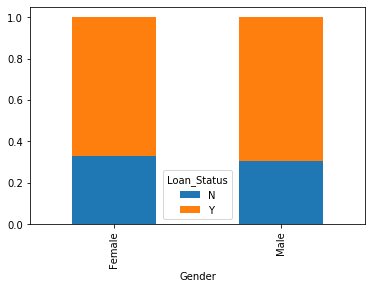

In [21]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)

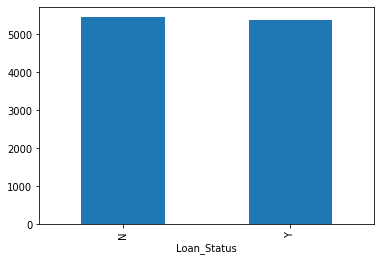

In [22]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [23]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [25]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [27]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [28]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])

In [29]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [30]:
train = train.drop('Loan_ID', axis = 1)
test = test.drop('Loan_ID', axis = 1)

In [31]:
x = train.drop('Loan_Status', axis = 1)
y = train.Loan_Status

In [32]:
x = pd.get_dummies(x)

In [33]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size = 0.3)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [37]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
pred_cv = model.predict(x_cv)

In [39]:
accuracy_score(y_cv, pred_cv)

0.8108108108108109

In [40]:
pred_test = model.predict(test)

In [41]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')

In [42]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [43]:
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [44]:
pd.DataFrame(submission, columns = ['Loan_ID','Loan_Status']).to_csv('LoanPrediction.csv')

In [45]:
x.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [46]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']

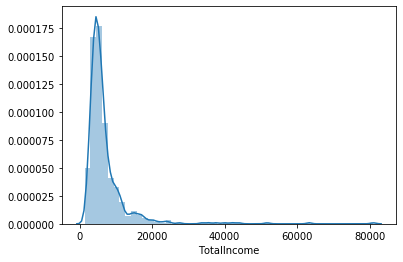

In [47]:
sns.distplot(train['TotalIncome'])

In [48]:
train['TotalIncome_log'] = np.log(train['TotalIncome'])
test['TotalIncome_log'] = np.log(test['TotalIncome'])

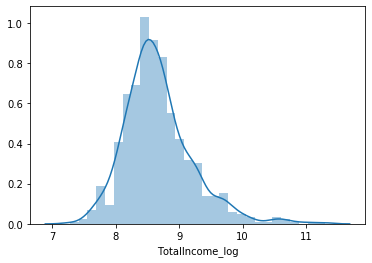

In [49]:
sns.distplot(train['TotalIncome_log'])

In [50]:
train['EMI'] = train['LoanAmount'] / train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount'] / test['Loan_Amount_Term']

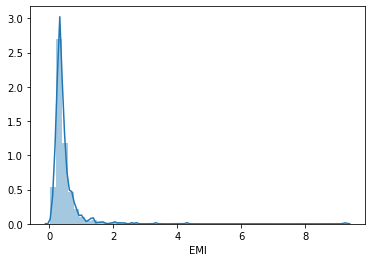

In [51]:
sns.distplot(train['EMI'])

In [52]:
train['BalanceIncome'] = train['TotalIncome']-(train['EMI']*1000)
test['BalanceIncome'] = test['TotalIncome']-(test['EMI']*1000)

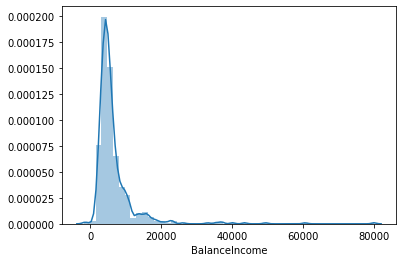

In [53]:
sns.distplot(train['BalanceIncome'])

In [54]:
train = train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)
test = test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis = 1)

In [55]:
from sklearn.model_selection import StratifiedKFold

In [56]:
i = 1
kf = StratifiedKFold(n_splits = 5, random_state = 1, shuffle = True)
for train_index, test_index in kf.split(x,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = x.loc[train_index],x.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state = 1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8360655737704918


In [57]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [58]:
pd.DataFrame(submission, columns = ['Loan_ID','Loan_Status']).to_csv('LoanPredictionLR.csv')